#2η ομαδική άσκηση στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

**ΣΤΟΙΧΕΙΑ ΟΜΑΔΑΣ**

Ομάδα: Μ09

Χαρδούβελης Γεώργιος-Ορέστης Α.Μ. 03115100<br>
Βεργοπούλου Έλενα Α.Μ. 03116723<br>

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

!sudo pip install --upgrade pip
!sudo pip install --upgrade tensorflow

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 9

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number()
#cifar100_classes_url = select_classes_number(40)
#cifar100_classes_url = select_classes_number(60)
#cifar100_classes_url = select_classes_number(0)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' beaver', ' bed', ' camel', ' can', ' caterpillar', ' crab', ' cup', ' forest', ' kangaroo', ' leopard', ' mushroom', ' orchid', ' sea', ' skyscraper', ' streetcar', ' table', ' tiger', ' trout', ' tulip', ' wardrobe']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


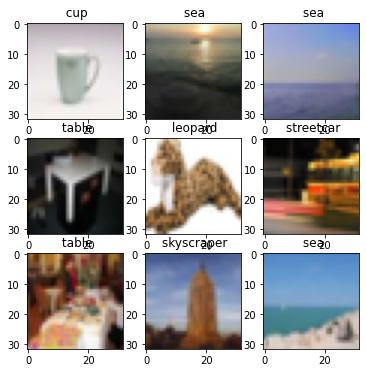

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
def augmentation(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_saturation(image, lower = 0.25, upper = 0.8)
  return image, label

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.map(augmentation, num_parallel_calls=AUTOTUNE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  ds = ds.cache()
  return ds

BATCH_SIZE=128
#BATCH_SIZE=256
#BATCH_SIZE=64
#BATCH_SIZE=32
#BATCH_SIZE=512

AUTOTUNE = tf.data.experimental.AUTOTUNE 
train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object


## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούνα να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε τα σχετικά λήμματα [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


In [ ]:
#imports and downloads

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import datetime


#for data augmentation
!pip install h5py

#function for graphs
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 4))
	#plt.suptitle('Training Curves')
	# plot loss
	# plot accuracy
	#plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

Using TensorFlow backend.


In [ ]:
#TFRecord

(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def filter_fn(image, label):
    return tf.reduce_any(tf.math.equal(label, our_index))

train__ds = ds_train.filter(filter_fn)
test__ds = ds_test.filter(filter_fn)

train_size = round( (1-validation_percentage) * data_size)

validation__ds = train_ds.skip(train_size)
train__ds = train_ds.take(train_size)


def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., tf.one_hot(label, 200)

#training time optimization
train__ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train__ds = train_ds.cache()
train__ds = train_ds.shuffle(ds_info.splits['train'].num_examples)
train__ds = train_ds.batch(BATCH_SIZE) 
#train__ds = train__ds.map(augmentation, num_parallel_calls=AUTOTUNE)
train__ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

validation__ds = validation__ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation__ds = validation__ds.cache()
validation__ds = validation__ds.batch(BATCH_SIZE) 
#validation__ds = ds.map(augmentation, num_parallel_calls=AUTOTUNE)
validation__ds = validation__ds.prefetch(tf.data.experimental.AUTOTUNE)

test__ds = test__ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test__ds = test__ds.cache()
test__ds = test__ds.shuffle(ds_info.splits['test'].num_examples)
test__ds = test__ds.batch(BATCH_SIZE) 
#test__ds = test__ds.map(augmentation, num_parallel_calls=AUTOTUNE)
test__ds = test__ds.prefetch(tf.data.experimental.AUTOTUNE)


## Ερώτημα 1

#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων



1.1.  Σχεδίασετε αρχικά τα ακόλουθα μοντέλα:

1.   **Softmax (baseline)**: FC(200), SOFTMAX

  2.   **MLP**: FC(512), RELU, FC(200), SOFTMAX

  3.   **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

  4. **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

  5. **CNN2**: σχεδίαστε την αρχιτεκτονική του και δικού σας μοντέλου 

1.2.  Μεταγλωτίστε και εκπαιδεύστε, έπειτα,  όλα τα μοντέλα σας, χρησιμοποιώντας 2 διαφορετικούς συνδυασμούς optimizer, loss, metrics και epoch (θα προκύψουν 10 διαφορετικά εκπαιδευμένα μοντέλα, 2 ανά αρχιτεκτονική). 

---

#### Βήμα 2: Αξιολόγηση των μοντέλων

2.1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1.2 (10 διαγράμματα) και επιλέξτε αυτό με την καλύτερη ακρίβεια από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 5).


2.2. Για κάθε ένα από τα μοντέλα με την καλύτερη ακρίβεια(συνολικά 5), απεικονίστε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών.


2.3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:

 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3

Αξιολογήστε την ακρίβεια για το test set σας.


In [ ]:
def train_model(model, epochs = 50, steps_per_epoch = 2, validation_steps = 1):
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
Total params: 614,600
Trainable params: 614,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 0s 35ms/step - loss: 4.7973 - accuracy: 0.0602 - val_loss: 3.8705 - val_accuracy: 0.0750
Epoch 2/70
10/10 [==============================] - 0s 18ms/step - loss: 3.5425 - accuracy: 0.0695 - val_loss: 3.2538 - val_accuracy: 0.0578
Epoch 3/70
10/10 [==============================] - 0s 18ms/step - loss: 3.1454 - accuracy: 0.0656 - val_loss: 3.1132 - val_accuracy: 0.0625
Epoch 4/70
10/10 [==============================] - 0s 17ms/step - loss: 3.0656 - accurac

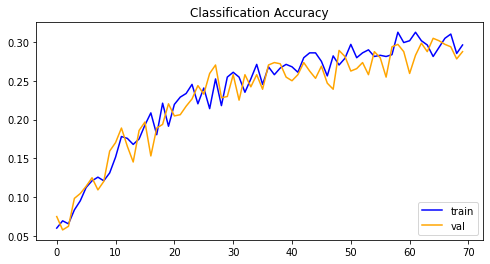


Test set evaluation metrics
10/10 [==============================] - 0s 7ms/step - loss: 2.4492 - accuracy: 0.2875
loss: 2.45
accuracy: 0.29
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
Total params: 614,600
Trainable params: 614,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 24ms/step - loss: 3.4560 - accuracy: 0.0703 - val_loss: 3.0503 - val_accuracy: 0.0672
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 2.9200 - accuracy: 0.1203 - val_loss: 2.7520 - val_accuracy: 0.1766
Epoch 3/50
10/10 [==============================] - 0s 18ms/step - loss: 2.7814 - accu

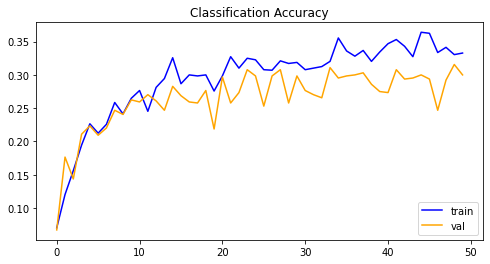


Test set evaluation metrics
10/10 [==============================] - 0s 7ms/step - loss: 2.3609 - accuracy: 0.3148
loss: 2.36
accuracy: 0.31


In [ ]:
#step 1
#FC(200), SOFTMAX

#1st combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Flatten( input_shape=(32, 32, 3) ))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history)

#2nd combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Flatten( input_shape=(32, 32, 3) ))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 50, 10, 5)
model_report(my_model, my_model_history)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_38 (Dense)             (None, 200)               102600    
Total params: 1,675,976
Trainable params: 1,675,976
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 0s 46ms/step - loss: 3.8980 - accuracy: 0.0805 - val_loss: 3.3263 - val_accuracy: 0.1000
Epoch 2/70
10/10 [==============================] - 0s 34ms/step - loss: 3.0898 - accuracy: 0.1187 - val_loss: 2.9208 - val_accuracy: 0.1484
Epoch 3/70
10/10 [==============================] - 0s 34ms/step - loss: 2.8745 - accuracy:

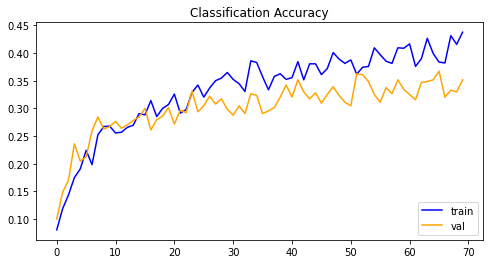


Test set evaluation metrics
30/30 [==============================] - 0s 13ms/step - loss: 2.2092 - accuracy: 0.3396
loss: 2.21
accuracy: 0.34
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_40 (Dense)             (None, 200)               102600    
Total params: 1,675,976
Trainable params: 1,675,976
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 0s 48ms/step - loss: 8.3279 - accuracy: 0.0531 - val_loss: 4.5329 - val_accuracy: 0.0750
Epoch 2/70
10/10 [==============================] - 0s 42ms/step - loss: 4.1294 - accurac

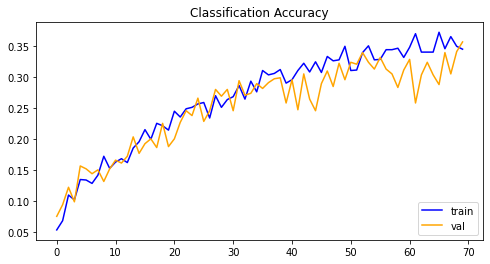


Test set evaluation metrics
30/30 [==============================] - 0s 13ms/step - loss: 2.2204 - accuracy: 0.3380
loss: 2.22
accuracy: 0.34


In [ ]:
#FC(512), RELU, FC(200), SOFTMAX

#1st combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Flatten( input_shape=(32, 32, 3) ))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))  
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history, 30)


#2nd combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Flatten( input_shape=(32, 32, 3) ))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))  
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history, 30)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               590336    
_________________________________________________________________
dense_42 (Dense)             (None, 200)             

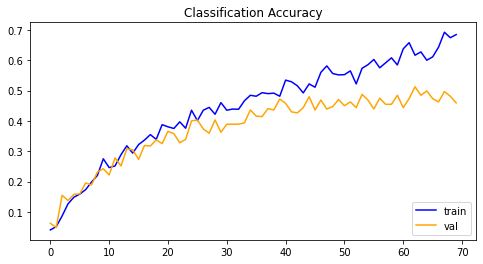


Test set evaluation metrics
30/30 [==============================] - 1s 40ms/step - loss: 1.7945 - accuracy: 0.4990
loss: 1.79
accuracy: 0.50
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)  

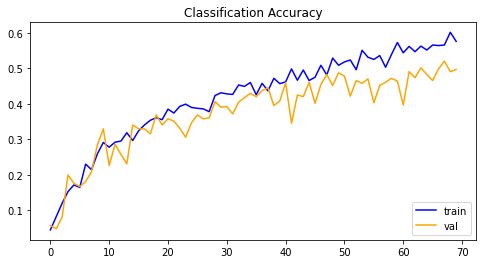


Test set evaluation metrics
30/30 [==============================] - 1s 40ms/step - loss: 1.6335 - accuracy: 0.5138
loss: 1.63
accuracy: 0.51


In [ ]:
#CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

#1st combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.006), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history, 30)


#2nd combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history, 30)



Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_37 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 200)             

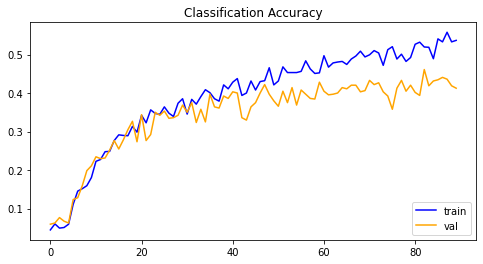


Test set evaluation metrics
30/30 [==============================] - 1s 30ms/step - loss: 1.8666 - accuracy: 0.4531
loss: 1.87
accuracy: 0.45
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_38 (Flatten)         (None, 512)  

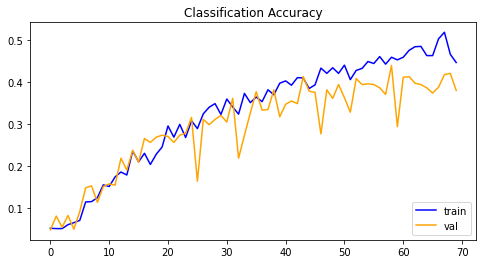


Test set evaluation metrics
30/30 [==============================] - 1s 30ms/step - loss: 2.0484 - accuracy: 0.3977
loss: 2.05
accuracy: 0.40


In [ ]:
#CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

#1st combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 90, 10, 5)
model_report(my_model, my_model_history, 30)


#2nd combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history, 30)




Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_31 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 384)             

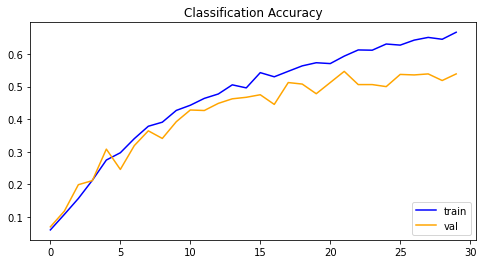


Test set evaluation metrics
30/30 [==============================] - 2s 51ms/step - loss: 1.5448 - accuracy: 0.5479
loss: 1.54
accuracy: 0.55
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_32 (Flatten)         (None, 1024) 

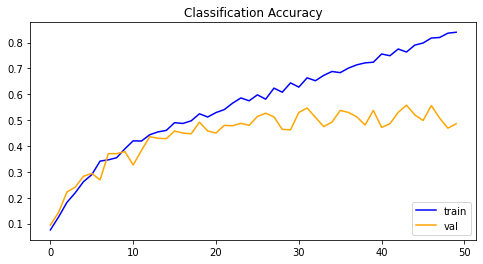


Test set evaluation metrics
30/30 [==============================] - 1s 45ms/step - loss: 1.8720 - accuracy: 0.5253
loss: 1.87
accuracy: 0.53


In [ ]:
#our model
#CONV(32, 3), RELU, POOL(2), CONV(64,3), RELU, POOL(2), CONV(64, 3), RELU, FC(384), RELU, FC(200), SOFTMAX 

#1st combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(384, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 30, 30, 5)
model_report(my_model, my_model_history, 30)


#2nd combo
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(384, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 50, 30, 5)
model_report(my_model, my_model_history, 30)





**Προσοχή** 

Για τα επόμενα ερωτήματα θα κρατήσετε το μοντέλο που αντιστοιχεί στον καλύτερο συνδυασμό ( optimizer, loss, metrics και epoch) από τα μοντέλα που εκπαιδεύσατε (και για τα 5 μοντέλα - όπως στο Ερώτημα 1, βήμα 2.2).

## Ερώτημα 2

### Βήμα 1: Έλεγχος υπερεκπαίδευσης

  1.1. Προτείνετε τεχνικές που θα χρησιμοποιήσετε για να αντιμετωπίσετε το πρόβλημα της υπερεκπαίδεσης και υλοποιήστε τις τεχνικές που προτείνετε για την εκπαίδευση του μοντέλου ώστε αυτό να γενικεύει καλύτερα.

Δοκιμάστε διάφορους τρόπους για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως:

- Πρόωρος τερματισμός (early stopping). Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε. [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)

- Dropout. Μια άλλη τεχνική για τη μείωση της υπερεκπαίδευσης είναι το Dropout. Είναι ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)

- Επαύξηση δεδομένων. Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. [Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)

### Βήμα 2
Αξιολογήστε την ακρίβεια για το validation και το test set σας.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

BATCH_SIZE = 128

datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
 width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
 horizontal_flip=True, fill_mode="nearest")

train_generator = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)


callbacks = [EarlyStopping(monitor='val_loss', patience=15), ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=False, save_frequency=1)]


def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
 history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=callbacks)
 #history = model.fit_generator(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks=callbacks)
 return(history)
 


#dropout layer def
dropout_layer = tf.keras.layers.Dropout(rate = 0.5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               614600    
Total params: 614,600
Trainable params: 614,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 1s 50ms/step - loss: 3.6905 - accuracy: 0.0500 - val_loss: 3.0398 - val_accuracy: 0.0984
Epoch 2/50
10/10 [==============================] - 0s 36ms/step - loss: 3.2418 - accuracy: 0.0906 - val_loss: 2.8600 - val_accuracy: 0.1344
Epoch 3/50
10/10 [==============================] - 0s 36ms/step - loss: 3.1100 - accuracy: 0.08

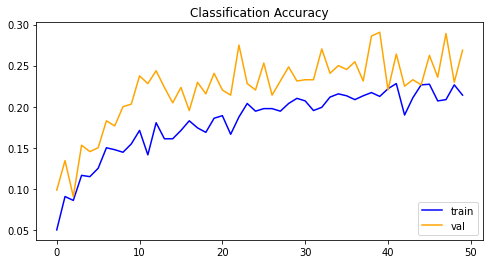


Test set evaluation metrics
30/30 [==============================] - 0s 13ms/step - loss: 2.5277 - accuracy: 0.2393
loss: 2.53
accuracy: 0.24


In [ ]:
#FC(200), SOFTMAX

def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Flatten( input_shape=(32, 32, 3) ))
  model.add(dropout_layer)
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 50, 10, 5)
model_report(my_model, my_model_history, 30)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 200)               102600    
Total params: 1,675,976
Trainable params: 1,675,976
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 1s 56ms/step - loss: 4.4345 - accuracy: 0.0594 - val_loss: 3.8053 - val_accuracy: 0.0656
Epoch 2/70
10/10 [==============================] - 0s 48ms/step - loss: 3.4208 - accuracy: 0.0867 - 

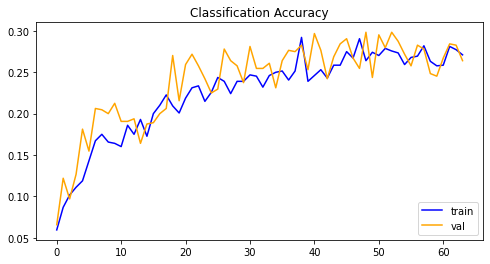


Test set evaluation metrics
30/30 [==============================] - 1s 17ms/step - loss: 2.3833 - accuracy: 0.2911
loss: 2.38
accuracy: 0.29


In [ ]:
#FC(512), RELU, FC(200), SOFTMAX
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Flatten( input_shape=(32, 32, 3) ))
  model.add(dropout_layer)
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))  
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 70, 10, 5)
model_report(my_model, my_model_history, 30)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

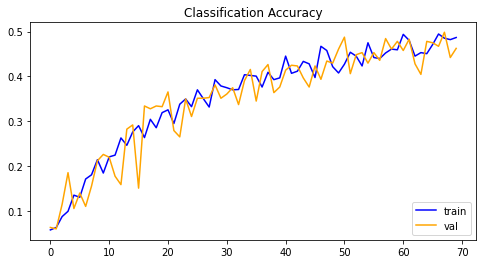


Test set evaluation metrics
30/30 [==============================] - 1s 43ms/step - loss: 1.8447 - accuracy: 0.5029
loss: 1.84
accuracy: 0.50


In [ ]:
#CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX
def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(dropout_layer)
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(dropout_layer)
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)


my_model_history = train_model(my_model, 70, 10, 5)


model_report(my_model, my_model_history, 30)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

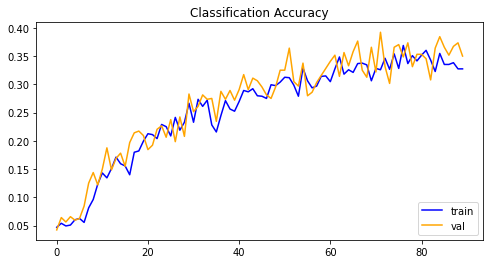


Test set evaluation metrics
30/30 [==============================] - 1s 38ms/step - loss: 2.1039 - accuracy: 0.3828
loss: 2.10
accuracy: 0.38


In [ ]:
#CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(dropout_layer)
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 90, 10, 5)
model_report(my_model, my_model_history, 30)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)             

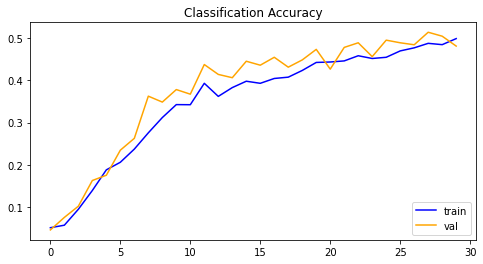


Test set evaluation metrics
30/30 [==============================] - 2s 51ms/step - loss: 1.5237 - accuracy: 0.5427
loss: 1.52
accuracy: 0.54


In [ ]:
#our model
#CONV(32, 3), RELU, POOL(2), CONV(64,3), RELU, POOL(2), CONV(64, 3), RELU, FC(384), RELU, FC(200), SOFTMAX 


def initialize_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(dropout_layer)
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(dropout_layer)
  model.add(layers.Flatten())
  model.add(layers.Dense(384, activation='relu'))
  model.add(layers.Dense(200, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

my_model = initialize_model(summary = True)
my_model_history = train_model(my_model, 30, 30, 5)
model_report(my_model, my_model_history, 30)

## Ερώτημα 3

Εφαρμόστε transfer learning για το μοντέλου σας, που αξιολογήσατε ως καλύτερο προς την ακρίβειά, στην αντιμετώπιση της υπερεκπαίδεσης. (Το καλύτερο μοντέλο που προέκυψε από το βήμα 2). Για το transfer learning επιλέξτε, ένα από τα διαθέσιμα μοντέλα για μεταφορά μάθησης. 

### Βήμα 1
"Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).

### Βήμα 2
  Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

### Βήμα 3 
Αξιολογήστε τα αποτελέσματά σας, βάσει της ακρίβειας του validation set και του test set σας, για τα προηγούμενα βήματα του Ερωτήματος 3 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               51300     
Total params: 14,765,988
Trainable params: 51,300
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/30
20/20 [==============================] - 38s 2s/step - loss: 4.3661 - accuracy: 0.0387 - val_loss: 3.4773 - val_accuracy: 0.0734
Epoch 2/30
20/20 [==============================] - 40s 2s/step - loss: 3.3696 - accuracy: 0.0

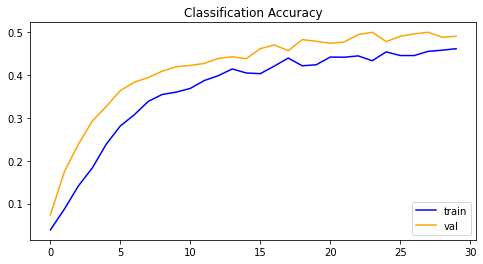


Test set evaluation metrics
30/30 [==============================] - 38s 1s/step - loss: 1.6775 - accuracy: 0.5198
loss: 1.68
accuracy: 0.52


In [ ]:
# step 1

def init_VGG16_model(summary):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(img_rows, img_cols, img_channels), include_top=False, weights='imagenet')


  VGG16_MODEL.trainable=False

  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

VGG16_MODEL = init_VGG16_model(summary = True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 30, 20, 10)

model_report(VGG16_MODEL, VGG16_MODEL_history, 30)


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               51300     
Total params: 14,765,988
Trainable params: 11,850,340
Non-trainable params: 2,915,648
_________________________________________________________________
Epoch 1/30
20/20 [==============================] - 184s 9s/step - loss: 3.5445 - accuracy: 0.1516 - val_loss: 2.2041 - val_accuracy: 0.3977
Epoch 2/30
20/20 [==============================] - 183s 9s/step - loss: 2.2959 - accuracy

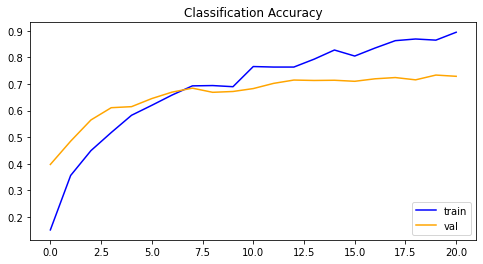


Test set evaluation metrics
30/30 [==============================] - 38s 1s/step - loss: 1.0095 - accuracy: 0.7263
loss: 1.01
accuracy: 0.73


In [ ]:
# step 2

def init_VGG16_model(summary):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(img_rows, img_cols, img_channels), include_top=False, weights='imagenet')


  #fine tuning
  VGG16_MODEL.trainable=True
  fine_tune_at = 2*len(VGG16_MODEL.layers)//3
  for layer in VGG16_MODEL.layers[:fine_tune_at]:
    layer.trainable =  False
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

VGG16_MODEL = init_VGG16_model(summary = True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 30, 20, 10)

model_report(VGG16_MODEL, VGG16_MODEL_history, 30)


#### Διαθέσιμα μοντέλα για μεταφορά μάθησης στο tf2 για να χρησιμοποιηθούν στην άσκηση

1. tf.keras.applications. Ο πιο απλός τρόπος για να κάνουμε μεταφορά μάθησης στο tf2 είναι μέσω του [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) που παρέχει προεκπαιδευμένα μοντέλα από το Keras και συγκεκριμένα τα δίκτυα: DenseNet, Inception-ResNet V2, Inception V3, MobileNet v1, MobileNet v2, NASNet-A, ResNet, ResNet v2, VGG16, VGG19 και Xception V1. Η εισαγωγή των μοντέλων γίνεται παρόμοια με αυτή που δείξαμε παραπάνω για το VGG16.

2. TensorFlow Hub. Μπορείτε επίσης να χρησιμοποιήσετε μοντέλα τα οποία είναι διαθέσιμα στο αποθετήριο [TensoFlow Hub](https://tfhub.dev/s?fine-tunable=yes&module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent&tf-version=tf2) το οποίο περιλαμβάνει πάνω από 100 προεκπαιδευμένα μοντέλα.


Σημειώστε ότι πολλά μοντέλα απαιτούν μεγαλύτερες διαστάσεις στην είσοδο από 
αυτές του CIFAR-100 και κατά συνέπεια τα δεδομένα πρέπει να [μετασχηματιστούν](https://www.tensorflow.org/api_docs/python/tf/image/resize). Προσέξτε ωστόσο τις απαιτήσεις σε μνήμη όταν αυτοί οι μετασχηματισμοί γίνονται απευθείας σε μεταβλητές (δες "Διαχείριση μνήμης"). 


### Εργαλεία υψηλού επιπέδου

Δεν είναι υποχρεωτικό στο πλαίσιο της άσκησης, αλλά αν  κάποιος επιθυμεί μπορεί να ασχοληθεί περαιτέρω με εργαλεία βελτιστοποίησης υψηλού επιπέδου (high-level). 


Για το TensorFlow μπορούμε να αναφέρουμε τα ακόλουθα:

- [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) και [What-If Tool](https://www.tensorflow.org/tensorboard/what_if_tool) Επικουρικό εργαλείο οπτικοποίησης για τον πειραματισμό στη Μηχανική Μάθηση
- [tf-explain](https://tf-explain.readthedocs.io/en/latest/) Προσφέρει μεθόδους επεξηγισιμότητας για το tf2
- [Keras Tuner](https://github.com/keras-team/keras-tuner) Βελτιστοποίηση υπερπαραμέτρων του Keras στο TensorFlow 2.0
- [AutoAugment](https://github.com/tensorflow/models/tree/master/research/autoaugment) Εκμάθηση της πολιτικης επαύξησης από τα δεδομένα